# Stanford Dogs Project

## Data Overview

The Stanford Dogs dataset contains 20,580 images of 120 different dog breeds
from across the globe. All the images are labeled with the dog’s breed, which
makes it a valuable dataset for fine-grained image classification tasks.
Specifics about the data:

*   It is made up of a collection of JPEG images with a variety of resolutions.
* The labels contain the breed names for each individual image.

## Project Objective

The main objective of my model is to correctly identify a dog’s breed from an
image. A successful model would produce a high level of accuracy for all the
different breeds, displaying its ability to differentiate between fine-grained classes
which usually exhibit tiny differences. It is important for the model to generalize
well to unseen images and classify those breeds correctly. The model should
also classify the images in a quick and efficient manner.

In [ ]:
# Imports
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D\

import tensorflow as tf

print("Loaded all libraries")

Loaded all libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

dataset_folder_path = '/content/drive/My Drive/Stanford Dogs'  # Change to your path
os.listdir(dataset_folder_path)  # This will list files in the folder


['StanfordDogsRough.ipynb', 'archive.zip']

In [ ]:
# Unzipping necessary files
!unzip -q "/content/drive/My Drive/Stanford Dogs/archive.zip" -d "/content/dataset"


In [ ]:
# Paths to data
images_file = "dataset/images/Images"
annotations_file = "dataset/annotations/Annotations"

In [ ]:
# Testing to make sure data was loaded properly
categories = os.listdir(images_file)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02108000-EntleBucher', 'n02097130-giant_schnauzer', 'n02097658-silky_terrier', 'n02113799-standard_poodle', 'n02106382-Bouvier_des_Flandres', 'n02107142-Doberman', 'n02096177-cairn', 'n02105056-groenendael', 'n02104365-schipperke', 'n02089867-Walker_hound', 'n02100236-German_short-haired_pointer', 'n02100735-English_setter', 'n02091635-otterhound', 'n02100877-Irish_setter', 'n02085936-Maltese_dog', 'n02089078-black-and-tan_coonhound', 'n02115913-dhole', 'n02098105-soft-coated_wheaten_terrier', 'n02107312-miniature_pinscher', 'n02087046-toy_terrier'] 

No. of categories =  20


In [ ]:
# Printing total breed amount
breed_list = sorted(os.listdir(images_file))

num_classes = len(breed_list)
print("{} breeds".format(num_classes))


120 breeds


In [ ]:
import cv2
import numpy as np

def load_images_from_folder(folder, breed_list, num_images=100):
    images = []
    labels = []
    for breed in breed_list:
        breed_path = os.path.join(folder, breed)
        breed_images = os.listdir(breed_path)[:num_images]
        for image in breed_images:
            img = cv2.imread(os.path.join(breed_path, image))
            img = cv2.resize(img, (224, 224))
            if img is not None:
                images.append(img)
                labels.append(breed)
    return np.array(images), np.array(labels)

# Loading a sample of images and labels
images, labels = load_images_from_folder(images_file, breed_list, num_images=10)


### Count of the Breeds

<ipython-input-9-1977ba9894ec>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


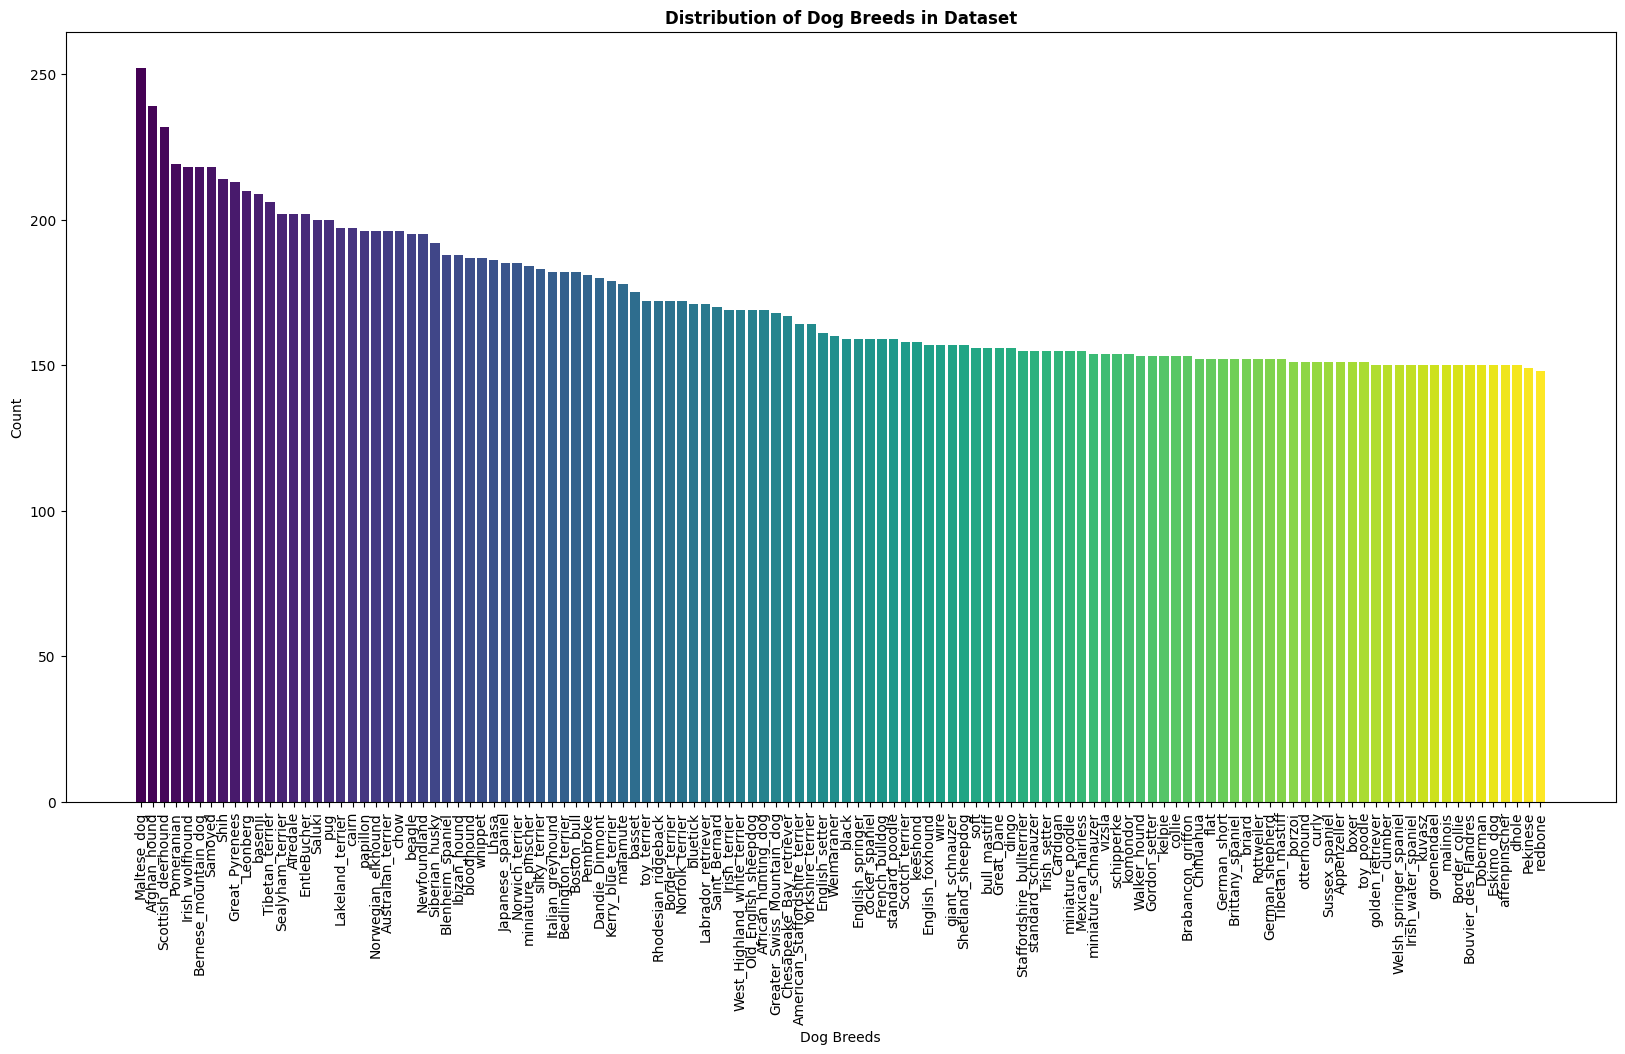

In [ ]:
from collections import Counter

def count_breeds(folder, breed_list):
    breed_counts = {}
    for breed in breed_list:
        # Processing the breed name to keep only the part after the first "-"
        processed_breed = breed.split("-")[1]
        breed_path = os.path.join(folder, breed)
        count = len(os.listdir(breed_path))
        breed_counts[processed_breed] = breed_counts.get(processed_breed, 0) + count
    return breed_counts

from matplotlib import cm

# Counting the number of images for each processed breed
breed_counts = count_breeds(images_file, breed_list)

# Sorting the breeds by count for better visualization
sorted_breeds = sorted(breed_counts.items(), key=lambda x: x[1], reverse=True)
breeds = [breed[0] for breed in sorted_breeds]
counts = [breed[1] for breed in sorted_breeds]

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from collections import Counter

# Creating a color map
cmap = cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(breeds)))

# Creating a bar chart
plt.figure(figsize=(20,10))
plt.bar(breeds, counts, color=colors)
plt.xlabel('Dog Breeds')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of Dog Breeds in Dataset', fontweight='bold')
plt.show()





In [ ]:
import pandas as pd

# Top 10 breeds dataframe
top_breeds = sorted(breed_counts.items(), key=lambda x: x[1], reverse=True)[:10]
df = pd.DataFrame(top_breeds, columns=['Breed', 'Count'])

# Making it look nicer
df_table = df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f4f4f8'), ('color', 'black')]
    }]
).set_properties(**{
    'background-color': '#f0f0f5',
    'color': 'black',
    'border-color': 'black'
}).set_caption("Top 10 Dog Breeds in Dataset")

# Displaying dataframe
df_table



,Breed,Count
0,Maltese_dog,252
1,Afghan_hound,239
2,Scottish_deerhound,232
3,Pomeranian,219
4,Irish_wolfhound,218
5,Bernese_mountain_dog,218
6,Samoyed,218
7,Shih,214
8,Great_Pyrenees,213
9,Leonberg,210


### Random Images within the Dataset

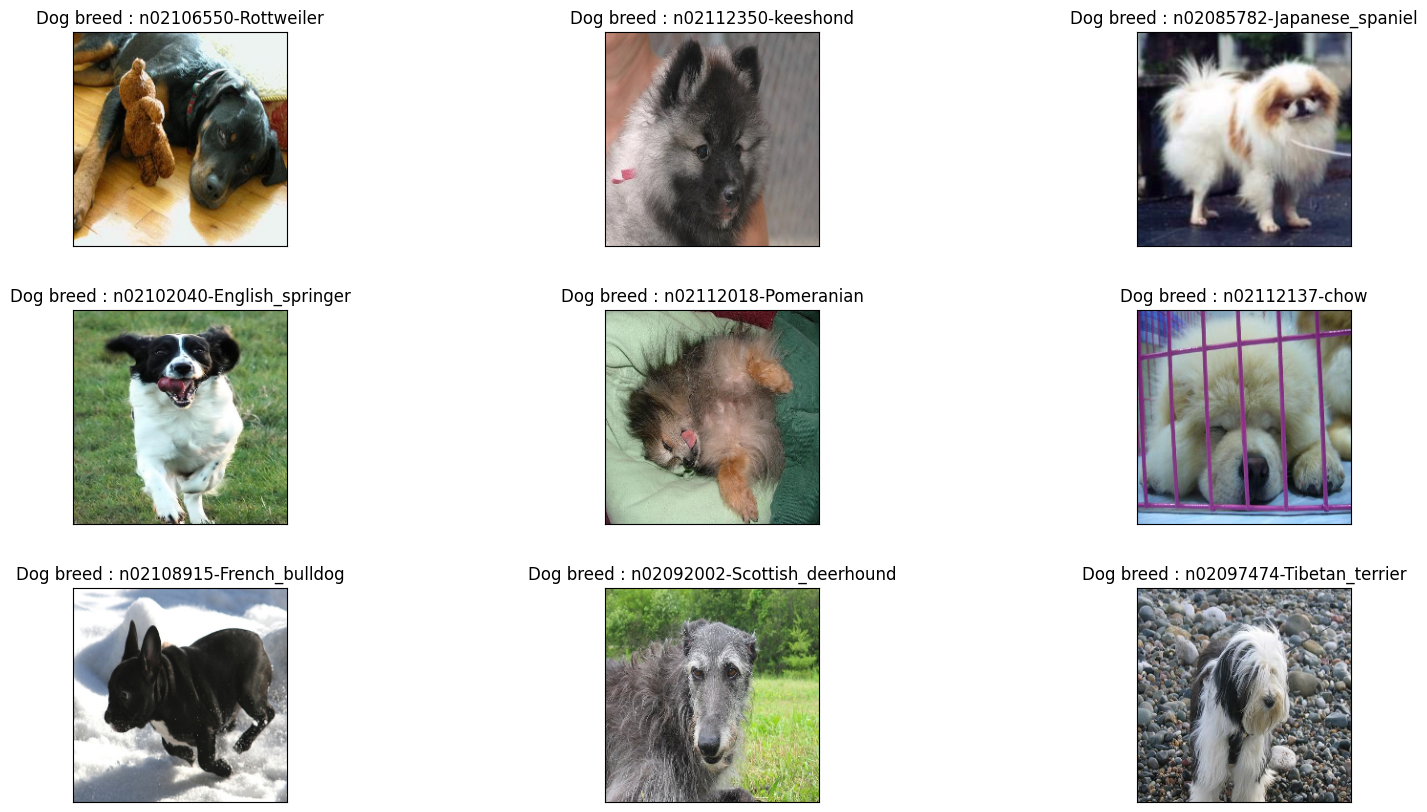

In [ ]:
import matplotlib.pyplot as plt

def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)

        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(cv2.cvtColor(images[r[0]], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB

        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

# Displaying random images with labels
display_rand_images(images, labels)


### Data Augmentation and Preprocessing

In [ ]:
#Creating DataGenerators to get labels from image directories

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size=224  #for the inception model

train_datagen=ImageDataGenerator(
                        rescale=1./255,
                        validation_split=0.2,
                        horizontal_flip=True,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        rotation_range=40,
                        fill_mode='nearest'
                        )

train_generator=train_datagen.flow_from_directory(
                        images_file,
                        target_size=(image_size,image_size),
                        subset='training',
                        shuffle=True,
                        batch_size=24,
                        class_mode='categorical'
                        )

valid_datagen=ImageDataGenerator(
                        validation_split=0.2,
                        rescale=1./255
                        )

valid_generator=valid_datagen.flow_from_directory(
                        images_file,
                        target_size=(image_size,image_size),
                        subset='validation',
                        shuffle=False,
                        batch_size=24,
                        class_mode='categorical'
                        )


Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


## Model 1: Custom Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Adjusting the model architecture
model = Sequential()

model.add(Conv2D(16, (3, 3),  activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# First Convolutional Block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())  # Add batch normalization
model.add(MaxPooling2D(2, 2))

# Second Convolutional Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(MaxPooling2D(2,2))

# Third Convolutional Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(MaxPooling2D(2,2))

# Flatten the results to feed into a Dense layer
model.add(Flatten())

# 512 neuron hidden layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.5))  # Adjust dropout rate if needed

# Output layer with number of classes and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model with potential adjustments
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Training the model with callbacks
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=25,
      validation_data=valid_generator,
      validation_steps=valid_generator.samples // valid_generator.batch_size)


Epoch 1/25
687/687 [==============================] - 195s 280ms/step - loss: 5.3868 - accuracy: 0.0201 - val_loss: 4.7066 - val_accuracy: 0.0303
Epoch 2/25
687/687 [==============================] - 189s 275ms/step - loss: 4.8004 - accuracy: 0.0366 - val_loss: 4.6686 - val_accuracy: 0.0577
Epoch 3/25
687/687 [==============================] - 191s 278ms/step - loss: 4.5092 - accuracy: 0.0516 - val_loss: 4.2141 - val_accuracy: 0.0745
Epoch 4/25
687/687 [==============================] - 191s 277ms/step - loss: 4.2972 - accuracy: 0.0648 - val_loss: 4.2777 - val_accuracy: 0.0826
Epoch 5/25
687/687 [==============================] - 189s 275ms/step - loss: 4.1358 - accuracy: 0.0817 - val_loss: 4.6600 - val_accuracy: 0.0515
Epoch 6/25
687/687 [==============================] - 190s 276ms/step - loss: 3.9919 - accuracy: 0.0942 - val_loss: 3.9707 - val_accuracy: 0.1053
Epoch 7/25
687/687 [==============================] - 191s 278ms/step - loss: 3.8391 - accuracy: 0.1132 - val_loss: 3.6513 -

In [ ]:
# Final Model Evaluation
validation_loss, validation_accuracy = model.evaluate(valid_generator)

# Print the results
print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")

170/170 [==============================] - 8s 47ms/step - loss: 2.9069 - accuracy: 0.2746
Validation loss: 2.9069
Validation accuracy: 0.2746


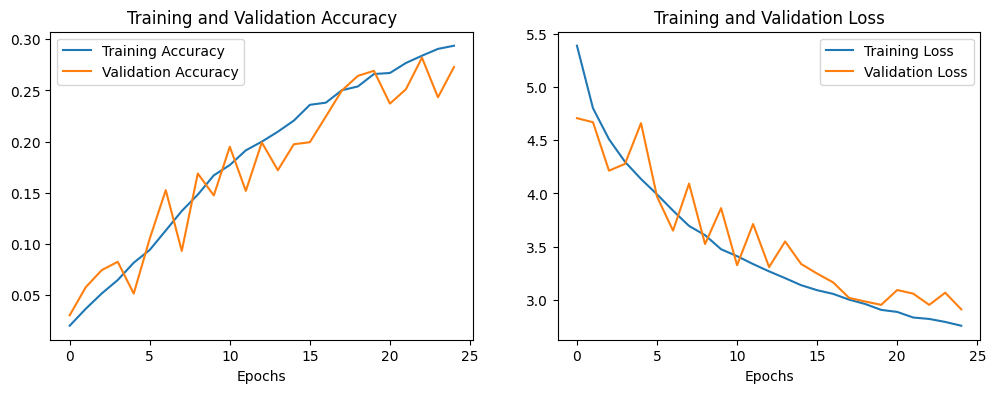

In [ ]:
# Plotting training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.show()


In [ ]:
# Saving model
model.save('model')

## Model 3: InceptionV3 Model without Early Stopping
* Model that performed the best

In [ ]:
# Loading InceptionV3 Base
base_model = InceptionV3(weights='imagenet', include_top=False)

# Adding a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Adding a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Adding a logistic layer for classes
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Model to train
model3 = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Freezing all layers in the base InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Model compiling and summary
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_213 (Conv2D)         (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_207 (B  (None, None, None, 32)       96        ['conv2d_213[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, None, None, 32)       0         ['batch_normalization_20

In [ ]:
# Fitting the model and training
history = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=22,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

Epoch 1/22
687/687 [==============================] - 201s 286ms/step - loss: 1.7745 - accuracy: 0.5719 - val_loss: 0.7806 - val_accuracy: 0.7717
Epoch 2/22
687/687 [==============================] - 196s 286ms/step - loss: 1.1145 - accuracy: 0.6836 - val_loss: 0.7301 - val_accuracy: 0.7865
Epoch 3/22
687/687 [==============================] - 196s 285ms/step - loss: 1.0203 - accuracy: 0.7080 - val_loss: 0.7282 - val_accuracy: 0.7865
Epoch 4/22
687/687 [==============================] - 194s 282ms/step - loss: 0.9798 - accuracy: 0.7125 - val_loss: 0.7056 - val_accuracy: 0.7924
Epoch 5/22
687/687 [==============================] - 194s 283ms/step - loss: 0.9388 - accuracy: 0.7256 - val_loss: 0.7000 - val_accuracy: 0.7956
Epoch 6/22
687/687 [==============================] - 194s 282ms/step - loss: 0.9094 - accuracy: 0.7354 - val_loss: 0.7121 - val_accuracy: 0.7909
Epoch 7/22
687/687 [==============================] - 194s 282ms/step - loss: 0.8757 - accuracy: 0.7380 - val_loss: 0.6971 -

In [ ]:
# Final Model Evaluation
validation_loss, validation_accuracy = model3.evaluate(valid_generator)

# Print the results
print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")

170/170 [==============================] - 10s 57ms/step - loss: 0.7133 - accuracy: 0.7991
Validation loss: 0.7133
Validation accuracy: 0.7991


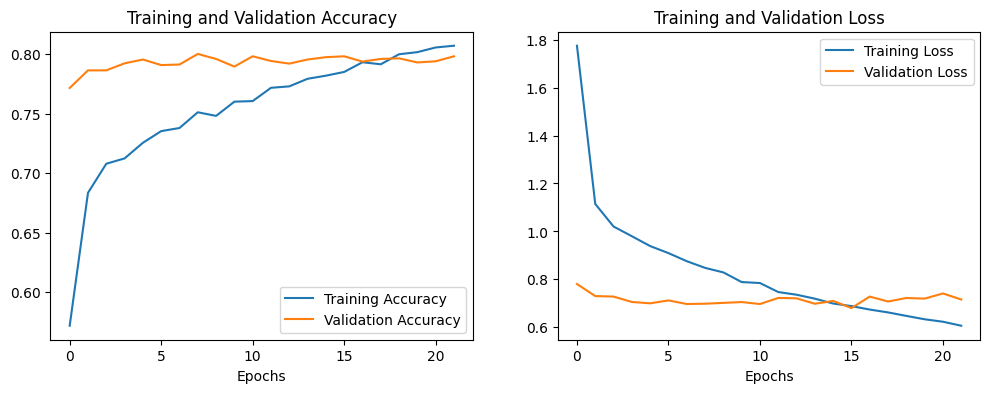

In [ ]:
# Plotting training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.show()


In [ ]:
model.save('model3')

In [ ]:
pip install tensorflow opencv-python matplotlib


In [ ]:
for layer in reversed(model3.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

print("Last convolutional layer name: ", last_conv_layer_name)


Last convolutional layer name:  conv2d_306


In [ ]:
for layer in model3.layers:
    print(layer.name)


## Grad CAM

Selected Image: dataset/images/Images/n02110063-malamute/n02110063_5828.jpg


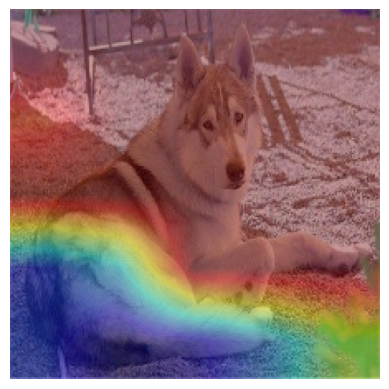

1/1 [==============================] - 0s 26ms/step
Top 5 Predictions:
n02110063-malamute: 0.7712
n02110185-Siberian_husky: 0.1282
n02109961-Eskimo_dog: 0.0989
n02091467-Norwegian_elkhound: 0.0013
n02106662-German_shepherd: 0.0001


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model3.inputs], [model3.get_layer(last_conv_layer_name).output, model3.output]
    )

    # compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Each entry is the mean intensity of the gradient
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we'll normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.4):
    # Using cv2 to load the original image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Ensuring the heatmap is resized to have same size as original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Converting the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # Applying the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimposing the heatmap on the original image
    superimposed_img = heatmap * alpha + img * (1 - alpha)

    # Display Grad-CAM
    plt.imshow(superimposed_img / 255)
    plt.axis('off')
    plt.show()



# Loading pre-trained model
model = tf.keras.models.load_model('model3')

import os
import random

# Path to the Stanford Dogs dataset
dataset_path = 'dataset/images/Images'

# Getting all breed directories
breed_dirs = os.listdir(dataset_path)

# Randomly selecting a breed
selected_breed = random.choice(breed_dirs)
selected_breed_path = os.path.join(dataset_path, selected_breed)

# Getting all images in the selected breed directory
breed_images = os.listdir(selected_breed_path)

# Randomly selecting an image
selected_image = random.choice(breed_images)
selected_image_path = os.path.join(selected_breed_path, selected_image)

print(f"Selected Image: {selected_image_path}")

img = tf.keras.preprocessing.image.load_img(selected_image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Loading the original image in the correct format
original_img = cv2.cvtColor(cv2.imread(selected_image_path), cv2.COLOR_BGR2RGB)

# Resizing image
original_img_resized = cv2.resize(original_img, (224, 224))

# Grad-CAM process
heatmap = make_gradcam_heatmap(img_array, model3, 'conv2d_306')

display_gradcam(original_img_resized, heatmap)

import numpy as np

def display_top_5_predictions(img_array, model):
    prediction = model3.predict(img_array)
    predicted_class_indices = np.argsort(prediction[0])[::-1][:5]  # Sort and get top 5 indices

    print("Top 5 Predictions:")
    for i in predicted_class_indices:
        breed_name = class_index_to_breed_name[i]
        probability = prediction[0][i]
        print(f"{breed_name}: {probability:.4f}")

# Displaying top 5 predictions for the mixed breed dog image
display_top_5_predictions(img_array, model)


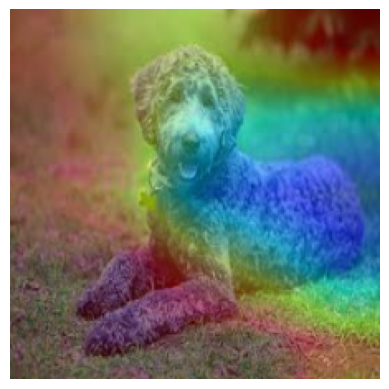

In [ ]:
# Path to the mixed breed dog image
mixed_breed_image_path = 'Labra.jpeg'

# Loading and preprocessing the image
mixed_breed_img = tf.keras.preprocessing.image.load_img(mixed_breed_image_path, target_size=(224, 224))
mixed_breed_img_array = tf.keras.preprocessing.image.img_to_array(mixed_breed_img)
mixed_breed_img_array = np.expand_dims(mixed_breed_img_array, axis=0)
mixed_breed_img_array = mixed_breed_img_array / 255.0

# Ensuring that image is in the correct format
mixed_breed_img = cv2.cvtColor(cv2.imread(mixed_breed_image_path), cv2.COLOR_BGR2RGB)

# Ensuring image is resized to the target size
mixed_breed_img = cv2.resize(mixed_breed_img, (224, 224))

# Generating and displaying the heatmap for the mixed breed dog image
mixed_breed_heatmap = make_gradcam_heatmap(mixed_breed_img_array, model3, 'conv2d_306')
display_gradcam(mixed_breed_img, mixed_breed_heatmap)


In [ ]:
import numpy as np

def display_top_5_predictions(img_array, model):
    prediction = model.predict(img_array)
    predicted_class_indices = np.argsort(prediction[0])[::-1][:5]  # Sort and get top 5 indices

    print("Top 5 Predictions:")
    for i in predicted_class_indices:
        breed_name = class_index_to_breed_name[i]
        probability = prediction[0][i]
        print(f"{breed_name}: {probability:.4f}")

# Displaying top 5 predictions for the mixed breed dog image
display_top_5_predictions(mixed_breed_img_array, model3)




1/1 [==============================] - 0s 25ms/step
Top 5 Predictions:
n02113712-miniature_poodle: 0.5416
n02113799-standard_poodle: 0.3692
n02113624-toy_poodle: 0.0524
n02102973-Irish_water_spaniel: 0.0188
n02099429-curly-coated_retriever: 0.0138


In [ ]:
# Load pre-trained model3
model3 = tf.keras.models.load_model('model3')

# Finding the name of the last convolutional layer for the gradcam
for layer in reversed(model3.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

print("Last convolutional layer name: ", last_conv_layer_name)

Last convolutional layer name:  conv2d_469


Selected Image: dataset/images/Images/n02097658-silky_terrier/n02097658_8053.jpg


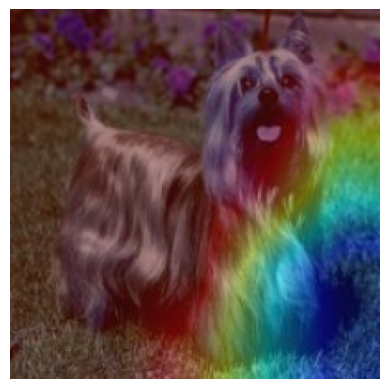

In [ ]:
# Path to the Stanford Dogs dataset
dataset_path = 'dataset/images/Images'

# Get all breed directories
breed_dirs = os.listdir(dataset_path)

# Randomly selecting a breed
selected_breed = random.choice(breed_dirs)
selected_breed_path = os.path.join(dataset_path, selected_breed)

# Getting all images in the selected breed directory
breed_images = os.listdir(selected_breed_path)

# Randomly selecting an image
selected_image = random.choice(breed_images)
selected_image_path = os.path.join(selected_breed_path, selected_image)

print(f"Selected Image: {selected_image_path}")

img = tf.keras.preprocessing.image.load_img(selected_image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Loading the original image in the correct format
original_img = cv2.cvtColor(cv2.imread(selected_image_path), cv2.COLOR_BGR2RGB)

# Resizing the original image to match the model's expected input size
original_img_resized = cv2.resize(original_img, (224, 224))

# Grad-CAM process
heatmap = make_gradcam_heatmap(img_array, model3, 'conv2d_469')

display_gradcam(original_img_resized, heatmap)

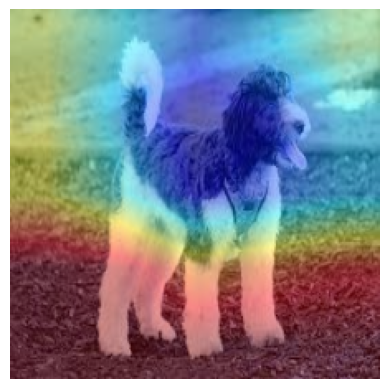

In [ ]:
# Path to the mixed breed dog image
mixed_breed_image_path = 'Labra2.jpeg'

# Loading and preprocessing the image
mixed_breed_img = tf.keras.preprocessing.image.load_img(mixed_breed_image_path, target_size=(224, 224))
mixed_breed_img_array = tf.keras.preprocessing.image.img_to_array(mixed_breed_img)
mixed_breed_img_array = np.expand_dims(mixed_breed_img_array, axis=0)
mixed_breed_img_array = mixed_breed_img_array / 255.0

# Ensuring that image is in the correct format (RGB)
mixed_breed_img = cv2.cvtColor(cv2.imread(mixed_breed_image_path), cv2.COLOR_BGR2RGB)

# Ensure image is resized to the target size
mixed_breed_img = cv2.resize(mixed_breed_img, (224, 224))

# Generate and display the heatmap for the mixed breed dog image
mixed_breed_heatmap = make_gradcam_heatmap(mixed_breed_img_array, model3, 'conv2d_469')
display_gradcam(mixed_breed_img, mixed_breed_heatmap)

In [ ]:
breed_list = sorted(os.listdir(images_file))
num_classes = len(breed_list)
print("{} breeds".format(num_classes))

class_index_to_breed_name = {i: breed for i, breed in enumerate(breed_list)}

def display_prediction(img_array, model3):
    prediction = model3.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]  # Get the first element of the array
    breed_name = class_index_to_breed_name[predicted_class_index]  # Use the index to get the breed name
    print(f"Predicted Breed: {breed_name}")

# Display prediction for the mixed breed dog image
display_prediction(mixed_breed_img_array, model3)

120 breeds
1/1 [==============================] - 0s 32ms/step
Predicted Breed: n02113712-miniature_poodle


# OLD ATTEMPTS
* Model attempts that were not used for final project

In [ ]:
# Load the VGG16 model pre-trained on ImageNet data
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Freeze the layers of the VGG16 model
for layer in vgg16_base.layers:
    layer.trainable = False


In [ ]:
from keras.regularizers import l1, l2

# Add custom layers on top of the VGG16 base
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # L2 regularization
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=vgg16_base.input, outputs=output)


In [ ]:
# Unfreeze some layers in the VGG16 base
for layer in vgg16_base.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // (2 * batch_size),
    epochs=25,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // (2 * batch_size)
)




Epoch 1/25
343/343 [==============================] - 99s 290ms/step - loss: 3.2453 - accuracy: 0.3115 - val_loss: 2.5696 - val_accuracy: 0.4152
Epoch 2/25
343/343 [==============================] - 99s 288ms/step - loss: 2.5764 - accuracy: 0.4327 - val_loss: 2.5736 - val_accuracy: 0.4315
Epoch 3/25
343/343 [==============================] - 99s 288ms/step - loss: 2.3071 - accuracy: 0.4898 - val_loss: 2.4782 - val_accuracy: 0.4420
Epoch 4/25
343/343 [==============================] - 99s 289ms/step - loss: 2.1696 - accuracy: 0.5153 - val_loss: 2.4513 - val_accuracy: 0.4712
Epoch 5/25
343/343 [==============================] - 99s 288ms/step - loss: 2.0641 - accuracy: 0.5445 - val_loss: 2.3794 - val_accuracy: 0.4931
Epoch 6/25
343/343 [==============================] - 98s 287ms/step - loss: 1.9537 - accuracy: 0.5624 - val_loss: 2.4720 - val_accuracy: 0.4752
Epoch 7/25
343/343 [==============================] - 99s 289ms/step - loss: 1.8786 - accuracy: 0.5817 - val_loss: 2.3605 - val_ac

## Model 2: InceptionV3 Model with Early Stopping
* Not used in final presentation because Model 3 performed better

In [ ]:
# Loading InceptionV3 Base
base_model = InceptionV3(weights='imagenet', include_top=False)

# Adding global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Adding fully-connected layer
x = Dense(1024, activation='relu')(x)

# Adding logistic layer for classes
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Model to train
model2 = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Freezing all layers in the base InceptionV3 model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# model compiling and summary
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_119 (Conv2D)         (None, None, None, 32)       864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_113 (B  (None, None, None, 32)       96        ['conv2d_119[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_94 (Activation)  (None, None, None, 32)       0         ['batch_normalization_11

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Defining the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=22,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/22
687/687 [==============================] - 203s 287ms/step - loss: 1.7800 - accuracy: 0.5779 - val_loss: 0.7457 - val_accuracy: 0.7848
Epoch 2/22
687/687 [==============================] - 200s 291ms/step - loss: 1.1338 - accuracy: 0.6804 - val_loss: 0.7355 - val_accuracy: 0.7771
Epoch 3/22
687/687 [==============================] - 197s 287ms/step - loss: 1.0335 - accuracy: 0.7036 - val_loss: 0.6965 - val_accuracy: 0.7968
Epoch 4/22
687/687 [==============================] - 197s 287ms/step - loss: 0.9747 - accuracy: 0.7195 - val_loss: 0.6956 - val_accuracy: 0.7949
Epoch 5/22
687/687 [==============================] - 198s 287ms/step - loss: 0.9442 - accuracy: 0.7220 - val_loss: 0.6922 - val_accuracy: 0.7966
Epoch 6/22
687/687 [==============================] - 197s 287ms/step - loss: 0.9018 - accuracy: 0.7319 - val_loss: 0.6877 - val_accuracy: 0.7991
Epoch 7/22
687/687 [==============================] - 195s 284ms/step - loss: 0.8830 - accuracy: 0.7378 - val_loss: 0.6905 -

In [ ]:
# Final Model Evaluation
validation_loss, validation_accuracy = model2.evaluate(valid_generator)

# Print the results
print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")


170/170 [==============================] - 11s 63ms/step - loss: 0.7161 - accuracy: 0.7922
Validation loss: 0.7161
Validation accuracy: 0.7922


In [ ]:
# Saving model
model.save('model2')
